In [2]:
import pandas as pd
import numpy as np
import pycaret as pc
#print('PyCaret: %s' % pycaret.__version__)
import matplotlib.pyplot as plt

In [5]:
df_main = pd.read_csv('df_train_data_with_price.csv').set_index('Unnamed: 0')
#Shape : 11333,65
#df_main.head()
df_main.shape

(11333, 254)

In [6]:
df_main

,Tikr_x,Sales_yr_1,Sales_yr_2,Sales_yr_3,Sales_yr_4,Sales_yr_5,Sales_yr_2_YoY,Sales_yr_3_YoY,Sales_yr_4_YoY,Sales_yr_5_YoY,...,Trend_lag_08,Trend_lag_09,Trend_lag_10,Trend_lag_11,Trend_lag_12,Return,Year,Tikr_y,Nifty_Returns,Return_adj
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,20MICRONS,175.00,234.00,262.00,275.00,288.00,33.714286,11.965812,4.961832,4.727273,...,-2.150535,-0.125591,-3.175105,-0.689936,-0.809149,-17.771610,2015,NIFTY50,41.708545,-59.480156
1,21STCENMGM,1.18,23.45,-4.20,0.12,1.08,1887.288136,-117.910448,-102.857143,800.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,2015,NIFTY50,41.708545,NaN
2,3IINFOTECH,692.00,963.00,1120.00,1198.00,1278.00,39.161850,16.303219,6.964286,6.677796,...,NaN,NaN,NaN,NaN,NaN,4.551384,2015,NIFTY50,41.708545,-37.157161
3,3MINDIA,1087.00,1191.00,1405.00,1574.00,1742.00,9.567617,17.968094,12.028470,10.673443,...,17.388658,10.294305,-2.990968,5.465670,-0.208745,155.501282,2015,NIFTY50,41.708545,113.792736
4,3PLAND,70.27,99.43,125.64,133.58,137.98,41.497083,26.360253,6.319643,3.293906,...,-10.296682,-7.003894,-9.309623,-0.230679,-4.277458,NaN,2015,NIFTY50,41.708545,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11328,ZODJRDMKJ,16.09,18.06,20.00,14.85,12.54,12.243630,10.741971,-25.750000,-15.555556,...,-11.012711,-7.989310,-3.104655,-1.519381,19.804785,-12.532473,2021,NIFTY50,37.429123,-49.961597
11329,ZOTA,64.00,70.00,77.00,85.00,95.00,9.375000,10.000000,10.389610,11.764706,...,2.797748,1.194742,-2.987320,-0.625662,9.348472,34.790204,2021,NIFTY50,37.429123,-2.638919
11330,ZUARI,5264.00,4077.00,4648.00,4731.00,50.00,-22.549392,14.005396,1.785714,-98.943141,...,-2.044615,-6.477034,-3.899013,10.032644,7.933994,-32.543240,2021,NIFTY50,37.429123,-69.972363


In [7]:
# Removing rows containing nans
df_main = df_main[df_main['Return'].notna()]
df_main.shape
#8936,65
#8923,242

(8923, 254)

C:\Users\hashmy\AppData\Roaming\Python\Python36\site-packages\pandas\core\frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
C:\Users\hashmy\AppData\Roaming\Python\Python36\site-packages\pandas\core\frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


<AxesSubplot:>

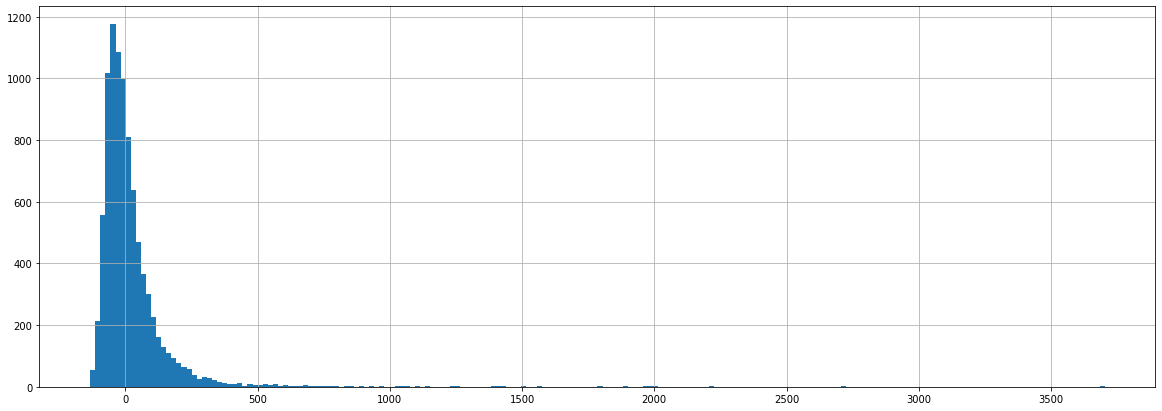

In [8]:
fig = plt.figure(figsize = (20,7))
ax = fig.gca()
df_main.replace([np.inf, -np.inf], 0, inplace=True)
df_main.fillna(0, inplace=True)
#df_main['Return'].replace([np.inf, -np.inf], 0, inplace=True)
df_main['Return_adj'].hist(bins = 200)
# From the distribution it seems most of the values are lying between -10 to 10.. that makes sense as well.

In [6]:
#df_main['Return_adj'].boxplot(column = 'Return_adj')

In [13]:
#Running a classification problem
# Creating two classes, 0 & 1
df_main['Return_class'] = np.where(df_main['Return_adj'] > 0,1,0)
df_main['Corona_Yr'] = np.where(df_main['Year'] == 2020,1,0)

validation_year = 2019
# Keeping 2018 data reserved for validation
df_validation = df_main[(df_main['Year'] == validation_year)]

# Removing 2018 data .. as it is reserved for Validation
df_train = df_main[~(df_main['Year'] == validation_year)]
df_train = df_train.drop(['Return_adj','Return','Tikr_x','Tikr_y','Nifty_Returns'],axis=1)
print(pd.DataFrame(df_main['Return_class'].value_counts()))
print(df_main['Return_class'].value_counts(normalize=True))

   Return_class
0          5022
1          3901
0    0.562815
1    0.437185
Name: Return_class, dtype: float64


C:\Users\hashmy\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hashmy\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
print(df_train.shape,df_validation.shape)
print(df_train['Return_class'].value_counts())
print(df_train['Return_class'].value_counts(normalize=True))

(7564, 251) (1359, 256)
0    3876
1    3688
Name: Return_class, dtype: int64
0    0.512427
1    0.487573
Name: Return_class, dtype: float64


In [15]:
# Upsampling dataset for minority class
from sklearn.utils import resample

minority_label = 1
majority_label = 0

print('minority_label -', minority_label)
print('majority_label -', majority_label)

df_majority = df_train[df_train['Return_class']==majority_label]
df_minority = df_train[df_train['Return_class']==minority_label]

upsample_count = df_train['Return_class'].value_counts()[majority_label]
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=upsample_count,    # to match majority class
                                 random_state=317) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
print(df_upsampled['Return_class'].value_counts())

minority_label - 1
majority_label - 0
1    3876
0    3876
Name: Return_class, dtype: int64


In [16]:
from pycaret import classification
# setup the environment 
classification_setup = classification.setup(data= df_upsampled, target='Return_class',silent=True)

,Description,Value
0,session_id,1431
1,Target,Return_class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(7752, 251)"
5,Missing Values,False
6,Numeric Features,245
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [17]:
# build the decision tree model
classification_dt = classification.create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7845,0.7846,0.8450,0.7533,0.7965,0.5692,0.5734
1,0.7569,0.7570,0.7860,0.7422,0.7634,0.5139,0.5148
2,0.7182,0.7183,0.7638,0.6993,0.7302,0.4366,0.4384
3,0.7366,0.7380,0.8007,0.7092,0.7522,0.4734,0.4774
4,0.7366,0.7367,0.7712,0.7207,0.7451,0.4734,0.4745
5,0.7753,0.7755,0.8487,0.7395,0.7904,0.5508,0.5568
6,0.7528,0.7528,0.8266,0.7203,0.7698,0.5055,0.5111
7,0.7103,0.7105,0.7556,0.6915,0.7221,0.4209,0.4227
8,0.7380,0.7382,0.7852,0.7162,0.7491,0.4762,0.4784
9,0.7288,0.7288,0.7407,0.7220,0.7313,0.4576,0.4578


In [18]:
# ensemble boosting
boosting = classification.ensemble_model(classification_dt, method= 'Boosting')

IntProgress(value=0, description='Processing: ', max=6)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:01:37
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Decision Tree Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


In [14]:
# compare performance of different classification models
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8004,0.8944,0.7905,0.8049,0.7974,0.6008,0.6012,0.6520
rf,Random Forest Classifier,0.7954,0.8831,0.7694,0.8099,0.7889,0.5907,0.5917,1.1140
lightgbm,Light Gradient Boosting Machine,0.7871,0.8777,0.8339,0.7613,0.7957,0.5745,0.5776,2.1360
gbc,Gradient Boosting Classifier,0.7525,0.8261,0.7990,0.7298,0.7625,0.5053,0.5080,7.3310
dt,Decision Tree Classifier,0.7326,0.7327,0.7775,0.7119,0.7430,0.4654,0.4679,0.3200
ada,Ada Boost Classifier,0.7068,0.7759,0.7108,0.7027,0.7066,0.4136,0.4138,1.4760
lda,Linear Discriminant Analysis,0.6867,0.7440,0.7456,0.6650,0.7028,0.3738,0.3768,0.1640
ridge,Ridge Classifier,0.6850,0.0000,0.7423,0.6641,0.7008,0.3705,0.3734,0.0370
knn,K Neighbors Classifier,0.6139,0.6522,0.6952,0.5957,0.6413,0.2285,0.2321,0.2610
lr,Logistic Regression,0.5673,0.5980,0.4831,0.5774,0.5257,0.1337,0.1356,1.5910


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=3329, verbose=0,
                     warm_start=False)

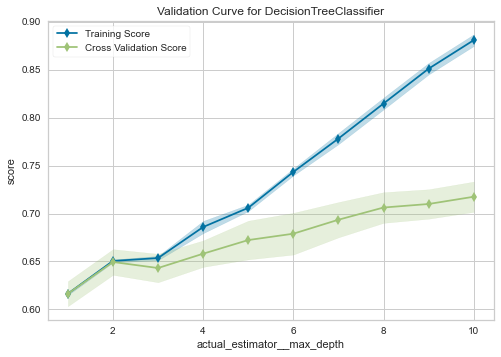

In [15]:
# Precision Recall Curve
classification.plot_model(classification_dt, plot = 'pr')

# Validation Curve
classification.plot_model(classification_dt, plot = 'vc')

In [16]:
# evaluate model
classification.evaluate_model(classification_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [18]:
# First method did not yield any results so now I will be trying basic models again manually, previous approach was more of an automated approach.
# Trying XgBoost & LGBM
import numpy as np 
import pandas as pd 
import seaborn as sns
import optuna
import matplotlib.pyplot as plt
%matplotlib inline

import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [20]:
df_upsampled.head()

,Sales_yr_1,Sales_yr_2,Sales_yr_3,Sales_yr_4,Sales_yr_5,Sales_yr_2_YoY,Sales_yr_3_YoY,Sales_yr_4_YoY,Sales_yr_5_YoY,Expenses_yr_1,...,MarketCap,CapFlag,LageCap,MidCap,SmallCap,TinyCap,Industry,Year,Return_class,Corona_Yr
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,175.0,234.0,262.0,275.0,288.0,33.714286,11.965812,4.961832,4.727273,157.0,...,12403.0,3.0,0.0,0.0,0.0,1.0,21.0,2015,0,0
2,692.0,963.0,1120.0,1198.0,1278.0,39.161850,16.303219,6.964286,6.677796,633.0,...,120441.0,2.0,0.0,0.0,1.0,0.0,27.0,2015,0,0
10,375.0,495.0,661.0,723.0,685.0,32.000000,33.535354,9.379728,-5.255878,319.0,...,4105.0,3.0,0.0,0.0,0.0,1.0,30.0,2015,0,0
12,1182.0,1191.0,639.0,797.0,820.0,0.761421,-46.347607,24.726135,2.885822,476.0,...,17189.0,3.0,0.0,0.0,0.0,1.0,22.0,2015,0,0
18,7637.0,9576.0,11275.0,11061.0,11645.0,25.389551,17.742272,-1.898004,5.279812,6045.0,...,3574061.0,0.0,1.0,0.0,0.0,0.0,7.0,2015,0,0


In [21]:
X = df_upsampled.drop(['Return_class'],axis=1)
Y = df_upsampled['Return_class'] 
print(X.shape, Y.shape)
# (7658, 69) (7658,)
# (7752, 238) (7752,)

(7752, 238) (7752,)


In [22]:
# spliting the data in to train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2021)
print(X_train.shape)
print(X_test.shape)

(6201, 238)
(1551, 238)


In [23]:
y_train.value_counts(normalize = True)
#y_test.value_counts(normalize = True)

0    0.501532
1    0.498468
Name: Return_class, dtype: float64

In [24]:
xgb_model = XGBClassifier().fit(X_train, y_train, 
                                eval_set=[(X_test, y_test)], 
                                eval_metric='auc', 
                                early_stopping_rounds=300, verbose = 0)

In [25]:
lgb_model = LGBMClassifier().fit(X_train, y_train, 
                                    eval_set=[(X_test, y_test)], 
                                    eval_metric='auc', 
                                    early_stopping_rounds=300, verbose = 0)

In [26]:
#df_train.isnull().values.any()
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(oob_score = True).fit(X_train, y_train)

In [27]:
lgb_y_pred = lgb_model.predict(X_test)
xgb_y_pred = xgb_model.predict(X_test)
rf_y_pred = rf_model.predict(X_test)

In [28]:
lgb_train_oof_preds = lgb_model.predict_proba(X_train)[:,1]
lgb_test_oof_preds = lgb_model.predict_proba(X_test)[:,1]
#lgb_test_preds[test_index] = test_oof_preds

xgb_train_oof_preds = xgb_model.predict_proba(X_train)[:,1]
xgb_test_oof_preds = xgb_model.predict_proba(X_test)[:,1]

rf_train_oof_preds = rf_model.predict_proba(X_train)[:,1]
rf_test_oof_preds = rf_model.predict_proba(X_test)[:,1]

In [29]:
print(": XGB - ROC AUC Score = {}".format(roc_auc_score(y_test, xgb_test_oof_preds)))
print(": LGB - ROC AUC Score = {}".format(roc_auc_score(y_train, lgb_train_oof_preds)))
print(": RF - ROC AUC Score = {}".format(roc_auc_score(y_train, rf_train_oof_preds)))

: XGB - ROC AUC Score = 0.8169321980342917
: LGB - ROC AUC Score = 0.9987983472398343
: RF - ROC AUC Score = 0.9999985956531826


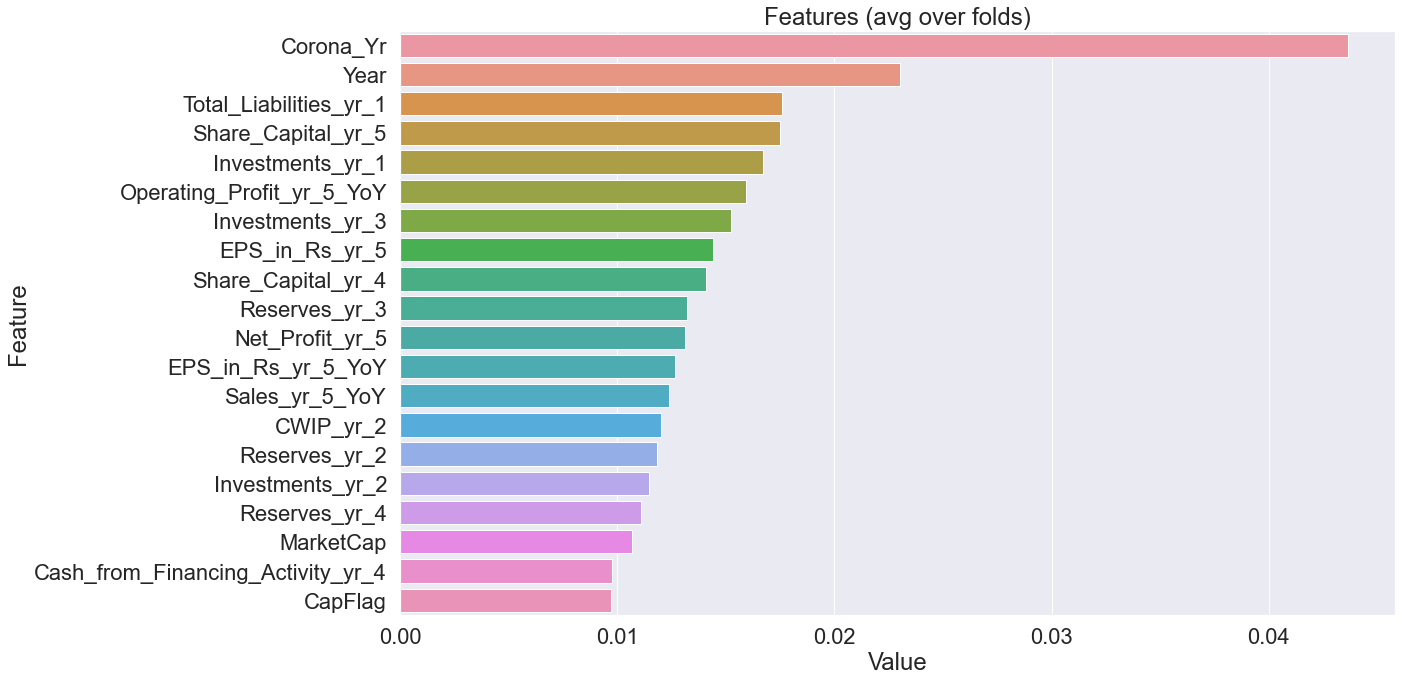

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def plotImp(model, X , num = 20, fig_size = (20, 10)):
    feature_imp = pd.DataFrame({'Value':model.feature_importances_,'Feature':X.columns})
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 2)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances-01.png')
    plt.show()

plotImp(xgb_model,X_train)

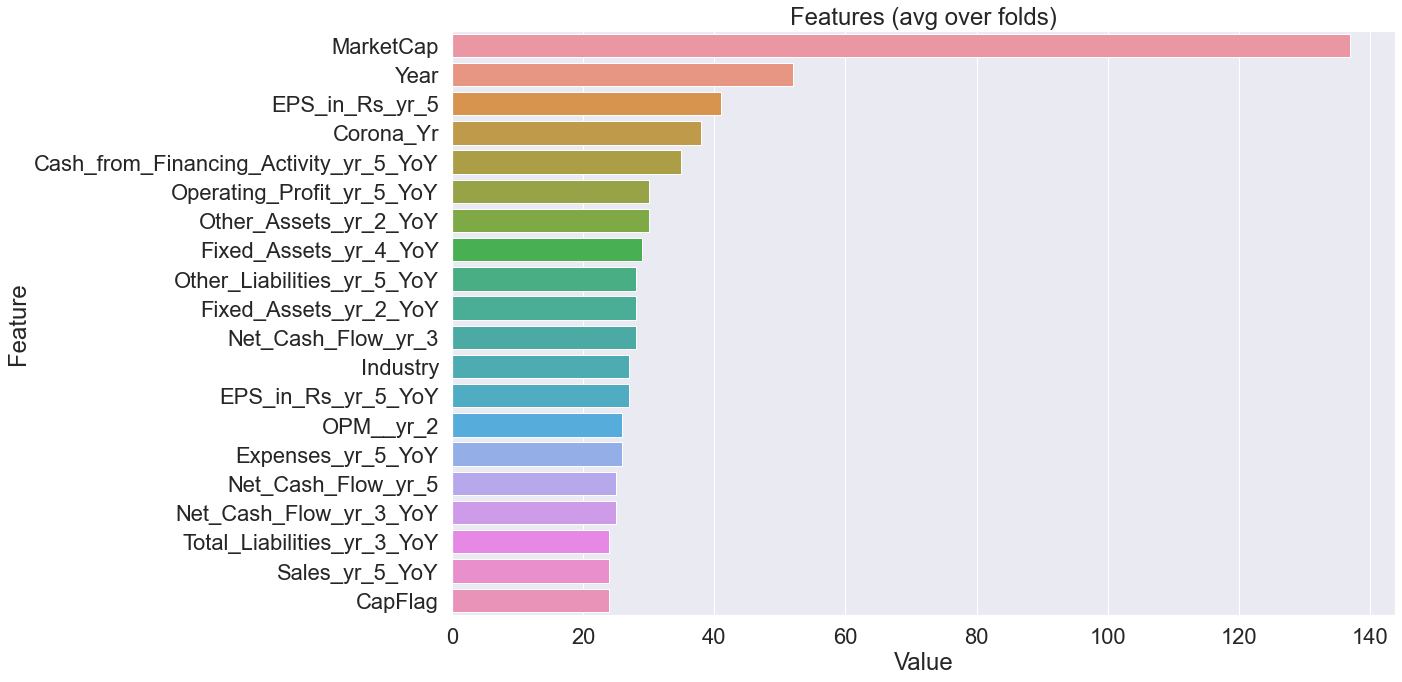

In [31]:
plotImp(lgb_model,X_train)

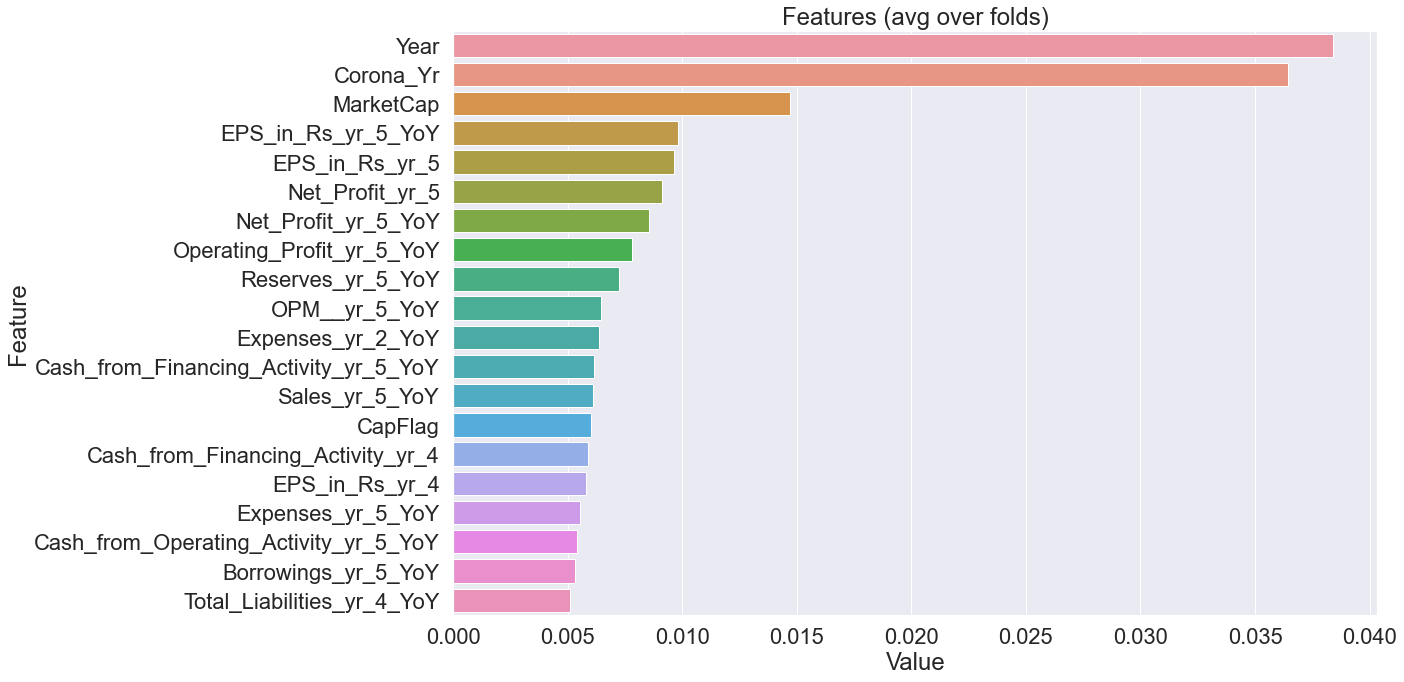

In [32]:
plotImp(rf_model,X_train)

In [33]:
# Model Accuracy, how often is the classifier correct?
from sklearn.metrics import accuracy_score
print("LGBM Accuracy:",accuracy_score(y_test, lgb_y_pred))
print("XGB Accuracy:",accuracy_score(y_test, xgb_y_pred))
print("RF Accuracy:",accuracy_score(y_test, rf_y_pred))

LGBM Accuracy: 0.7827208252740168
XGB Accuracy: 0.7421018697614442
RF Accuracy: 0.7994842037395229


In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import precision_recall_curve

cm = confusion_matrix(y_test, lgb_y_pred)

df_confusion = pd.crosstab(y_test, lgb_y_pred,rownames=['Predicted'], colnames=['Actual'], margins=False)
df_confusion_norm = df_confusion.T / (df_confusion.sum(axis=1)).T
print(cm)
print(df_confusion_norm)

[[579 187]
 [150 635]]
Predicted         0         1
Actual                       
0          0.755875  0.191083
1          0.244125  0.808917


In [35]:
precision, recall, fscore, support = score(y_test, lgb_y_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.79423868 0.77250608]
recall: [0.75587467 0.8089172 ]
fscore: [0.77458194 0.79029247]
support: [766 785]


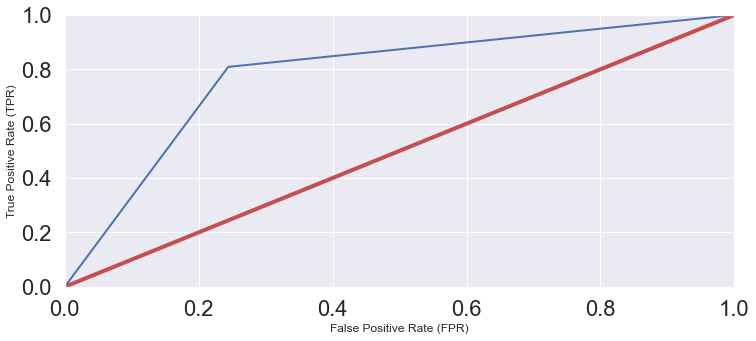

LGB ROC-AUC-Score: 0.782395935540736


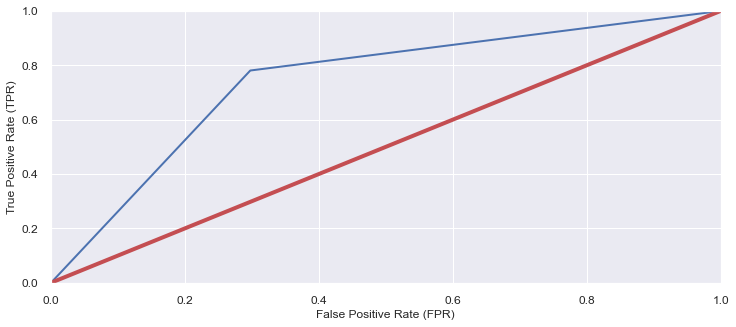

XGB ROC-AUC-Score: 0.7416207945984602


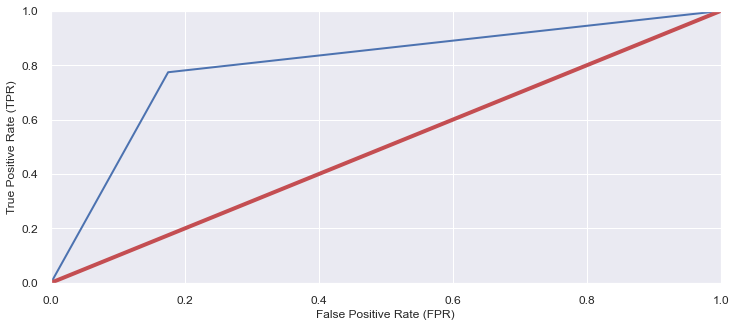

RF ROC-AUC-Score: 0.7997937835725334


In [36]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
#y_probs = lgb_model.predict_proba(X_test)[:,1]

# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.rc('xtick',labelsize=12)
    plt.rc('ytick',labelsize=12)
    plt.xlabel('False Positive Rate (FPR)', fontsize=12)
    plt.ylabel('True Positive Rate (TPR)', fontsize=12)

# LGB 
y_probs = lgb_model.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(12, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()
r_a_score = roc_auc_score(y_test, y_probs)
print("LGB ROC-AUC-Score:", r_a_score)

## XGB - ROC AUC Score
y_probs = xgb_model.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(12, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()
r_a_score = roc_auc_score(y_test, y_probs)
print("XGB ROC-AUC-Score:", r_a_score)


## RandomForest - ROC AUC Score
y_probs = rf_model.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(12, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()
r_a_score = roc_auc_score(y_test, y_probs)
print("RF ROC-AUC-Score:", r_a_score)


In [37]:
# df_main.head()
# df_valid = df_upsampled[df_upsampled['Year'] == 2021]
# df_valid = df_valid.drop(['Return_class'],axis=1)
#df_valid = df_main[df_main['Year'] == 2021]

df_validation_copy = df_validation[df_validation['Year'] == validation_year].copy()
#df_valid = df_valid.drop(['Return_adj','Return','Tikr_x','Tikr_y','Nifty_Returns','Return_class'],axis=1)
df_validation = df_validation.drop(['Return_adj','Return','Tikr_x','Tikr_y','Nifty_Returns','Return_class'],axis=1)
print(df_validation.shape)
print(df_validation_copy.shape)


(1359, 238)
(1359, 244)


In [38]:
lgb_valid_preds = lgb_model.predict_proba(df_validation)[:,1]
xgb_valid_preds = xgb_model.predict_proba(df_validation)[:,1]
rf_valid_preds = rf_model.predict_proba(df_validation)[:,1]
lgb_y_valid = lgb_model.predict(df_validation)
xgb_y_valid = xgb_model.predict(df_validation)
rf_y_valid = rf_model.predict(df_validation)

In [39]:
pred_list = pd.DataFrame(
    {'lgb_score': lgb_valid_preds,
     'xgb_score': xgb_valid_preds,
     'rf_score': rf_valid_preds,
     'lgb_label': lgb_y_valid,
     'xgb_label': xgb_y_valid,
     'rf_label': rf_y_valid,
    })
pred_list

,lgb_score,xgb_score,rf_score,lgb_label,xgb_label,rf_label
0,0.216185,0.527675,0.59,0,1,1
1,0.673038,0.692355,0.55,1,1,1
2,0.567422,0.690156,0.55,1,1,1
3,0.203978,0.297846,0.39,0,0,0
4,0.156655,0.232877,0.26,0,0,0
...,...,...,...,...,...,...
1354,0.195971,0.275174,0.29,0,0,0
1355,0.183775,0.386133,0.25,0,0,0
1356,0.391322,0.381481,0.31,0,0,0
1357,0.281442,0.318962,0.41,0,0,0


In [40]:
# bins = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
# labels = ["Bin 1-10","Bin 11-20","Bin 21-30","Bin 31-40","Bin 41-50","Bin 51-60","Bin 61-70","Bin 71-80","Bin 81-90","Bin 91-100"]
bins = [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]
labels = ["Bin 1-5","Bin 6-10","Bin 11-15","Bin 16-20","Bin 21-25","Bin 26-30","Bin 31-35","Bin 36-40","Bin 41-45","Bin 46-50","Bin 51-55","Bin 56-60","Bin 61-65","Bin 66-70","Bin 71-75","Bin 76-80",
            "Bin 81-85","Bin 86-90","Bin 91-95","Bin 96-100"]

pred_list['RandomForest_Bucket'] = pd.cut(pred_list['rf_score'], bins, labels = labels,include_lowest = True)
pred_list['XgBoost_Bucket'] = pd.cut(pred_list['xgb_score'], bins, labels = labels,include_lowest = True)
pred_list['LGBM_Bucket'] = pd.cut(pred_list['lgb_score'], bins, labels = labels,include_lowest = True)

pred_list['rf_decile'] = pd.qcut(pred_list['rf_score'], 30, labels=False)+1
pred_list['lgb_decile'] = pd.qcut(pred_list['lgb_score'], 30, labels=False)+1
pred_list['xgb_decile'] = pd.qcut(pred_list['xgb_score'], 30, labels=False)+1

pred_list['rf_decile'] = 'Decile_' + pred_list['rf_decile'].astype(str).str.pad(2,fillchar='0')
pred_list['lgb_decile'] = 'Decile_' + pred_list['lgb_decile'].astype(str).str.pad(2,fillchar='0')
pred_list['xgb_decile'] = 'Decile_' + pred_list['xgb_decile'].astype(str).str.pad(2,fillchar='0')
pred_list

,lgb_score,xgb_score,rf_score,lgb_label,xgb_label,rf_label,RandomForest_Bucket,XgBoost_Bucket,LGBM_Bucket,rf_decile,lgb_decile,xgb_decile
0,0.216185,0.527675,0.59,0,1,1,Bin 56-60,Bin 51-55,Bin 21-25,Decile_27,Decile_09,Decile_19
1,0.673038,0.692355,0.55,1,1,1,Bin 51-55,Bin 66-70,Bin 66-70,Decile_25,Decile_25,Decile_27
2,0.567422,0.690156,0.55,1,1,1,Bin 51-55,Bin 66-70,Bin 56-60,Decile_25,Decile_22,Decile_27
3,0.203978,0.297846,0.39,0,0,0,Bin 36-40,Bin 26-30,Bin 21-25,Decile_12,Decile_08,Decile_07
4,0.156655,0.232877,0.26,0,0,0,Bin 26-30,Bin 21-25,Bin 16-20,Decile_03,Decile_06,Decile_04
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,0.195971,0.275174,0.29,0,0,0,Bin 26-30,Bin 26-30,Bin 16-20,Decile_05,Decile_08,Decile_06
1355,0.183775,0.386133,0.25,0,0,0,Bin 21-25,Bin 36-40,Bin 16-20,Decile_03,Decile_07,Decile_11
1356,0.391322,0.381481,0.31,0,0,0,Bin 31-35,Bin 36-40,Bin 36-40,Decile_06,Decile_16,Decile_11
1357,0.281442,0.318962,0.41,0,0,0,Bin 41-45,Bin 31-35,Bin 26-30,Decile_14,Decile_11,Decile_08


In [41]:
df_validation_copy

,Tikr_x,Sales_yr_1,Sales_yr_2,Sales_yr_3,Sales_yr_4,Sales_yr_5,Sales_yr_2_YoY,Sales_yr_3_YoY,Sales_yr_4_YoY,Sales_yr_5_YoY,...,SmallCap,TinyCap,Industry,Return,Year,Tikr_y,Nifty_Returns,Return_adj,Return_class,Corona_Yr
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
6476,20MICRONS,288.00,311.00,333.00,357.00,385.0,7.986111,7.073955,7.207207,7.843137,...,0.0,1.0,21.0,-9.439269,2019,NIFTY50,20.821578,-30.260847,0,0
6478,3IINFOTECH,1278.00,1437.00,1431.00,1521.00,1833.0,12.441315,-0.417537,6.289308,20.512821,...,1.0,0.0,27.0,-38.302599,2019,NIFTY50,20.821578,-59.124178,0,0
6479,3MINDIA,1742.00,1840.00,2140.00,2363.00,2556.0,5.625718,16.304348,10.420561,8.167584,...,0.0,0.0,9.0,68.158844,2019,NIFTY50,20.821578,47.337266,1,0
6481,5PAISA,5.00,11.00,-1.00,7.00,20.0,120.000000,-109.090909,-800.000000,185.714286,...,1.0,0.0,23.0,1.204723,2019,NIFTY50,20.821578,-19.616856,0,0
6482,63MOONS,335.00,161.00,141.00,150.00,227.0,-51.940299,-12.422360,6.382979,51.333333,...,0.0,1.0,27.0,26.913983,2019,NIFTY50,20.821578,6.092405,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8089,ZODIACLOTH,344.00,323.00,301.00,269.00,236.0,-6.104651,-6.811146,-10.631229,-12.267658,...,0.0,1.0,30.0,-4.338865,2019,NIFTY50,20.821578,-25.160443,0,0
8090,ZODJRDMKJ,21.07,20.23,16.09,18.06,20.0,-3.986711,-20.464656,12.243630,10.741971,...,0.0,1.0,30.0,-10.102759,2019,NIFTY50,20.821578,-30.924337,0,0
8092,ZUARI,5173.00,5504.00,5264.00,4077.00,4648.0,6.398608,-4.360465,-22.549392,14.005396,...,1.0,0.0,4.0,-63.145134,2019,NIFTY50,20.821578,-83.966712,0,0


In [42]:
df_valid_out = pd.concat([df_validation_copy.reset_index(drop=True), pred_list], axis=1)
df_valid_out

,Tikr_x,Sales_yr_1,Sales_yr_2,Sales_yr_3,Sales_yr_4,Sales_yr_5,Sales_yr_2_YoY,Sales_yr_3_YoY,Sales_yr_4_YoY,Sales_yr_5_YoY,...,rf_score,lgb_label,xgb_label,rf_label,RandomForest_Bucket,XgBoost_Bucket,LGBM_Bucket,rf_decile,lgb_decile,xgb_decile
0,20MICRONS,288.00,311.00,333.00,357.00,385.0,7.986111,7.073955,7.207207,7.843137,...,0.59,0,1,1,Bin 56-60,Bin 51-55,Bin 21-25,Decile_27,Decile_09,Decile_19
1,3IINFOTECH,1278.00,1437.00,1431.00,1521.00,1833.0,12.441315,-0.417537,6.289308,20.512821,...,0.55,1,1,1,Bin 51-55,Bin 66-70,Bin 66-70,Decile_25,Decile_25,Decile_27
2,3MINDIA,1742.00,1840.00,2140.00,2363.00,2556.0,5.625718,16.304348,10.420561,8.167584,...,0.55,1,1,1,Bin 51-55,Bin 66-70,Bin 56-60,Decile_25,Decile_22,Decile_27
3,5PAISA,5.00,11.00,-1.00,7.00,20.0,120.000000,-109.090909,-800.000000,185.714286,...,0.39,0,0,0,Bin 36-40,Bin 26-30,Bin 21-25,Decile_12,Decile_08,Decile_07
4,63MOONS,335.00,161.00,141.00,150.00,227.0,-51.940299,-12.422360,6.382979,51.333333,...,0.26,0,0,0,Bin 26-30,Bin 21-25,Bin 16-20,Decile_03,Decile_06,Decile_04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,ZODIACLOTH,344.00,323.00,301.00,269.00,236.0,-6.104651,-6.811146,-10.631229,-12.267658,...,0.29,0,0,0,Bin 26-30,Bin 26-30,Bin 16-20,Decile_05,Decile_08,Decile_06
1355,ZODJRDMKJ,21.07,20.23,16.09,18.06,20.0,-3.986711,-20.464656,12.243630,10.741971,...,0.25,0,0,0,Bin 21-25,Bin 36-40,Bin 16-20,Decile_03,Decile_07,Decile_11
1356,ZUARI,5173.00,5504.00,5264.00,4077.00,4648.0,6.398608,-4.360465,-22.549392,14.005396,...,0.31,0,0,0,Bin 31-35,Bin 36-40,Bin 36-40,Decile_06,Decile_16,Decile_11
1357,ZUARIGLOB,170.00,39.00,0.00,0.00,17.0,-77.058824,-100.000000,0.000000,0.000000,...,0.41,0,0,0,Bin 41-45,Bin 31-35,Bin 26-30,Decile_14,Decile_11,Decile_08


In [43]:
df_valid_out.Return

0       -9.439269
1      -38.302599
2       68.158844
3        1.204723
4       26.913983
          ...    
1354    -4.338865
1355   -10.102759
1356   -63.145134
1357   -39.662675
1358    63.030264
Name: Return, Length: 1359, dtype: float64

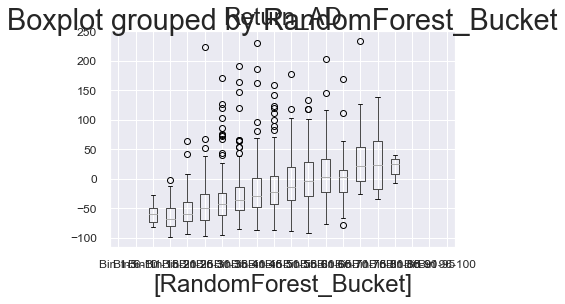

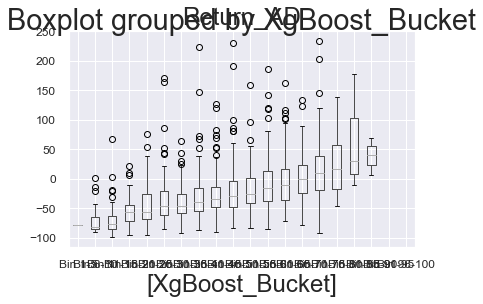

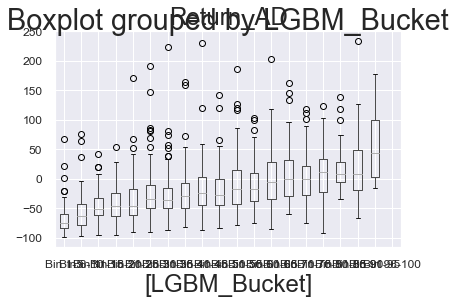

In [44]:
cols = ['Return'] # one or more

Q1 = df_valid_out['Return'].quantile(0.25)
Q3 = df_valid_out['Return'].quantile(0.75)
IQR = Q3 - Q1

#df_valid_out['Return'] < (Q1 - 4 * IQR))

df_valid_out['Return_AD'] = df_valid_out['Return'].mean()
df_valid_out['Return_AD'] = df_valid_out['Return'][~((df_valid_out[cols] < (Q1 - 5 * IQR)) |(df_valid_out[cols] > (Q3 + 5 * IQR))).any(axis=1)]

boxplot = df_valid_out.boxplot(column=['Return_AD'], by=['RandomForest_Bucket'],layout=(1, 1))
boxplot = df_valid_out.boxplot(column=['Return_AD'], by=['XgBoost_Bucket'])
boxplot = df_valid_out.boxplot(column=['Return_AD'], by=['LGBM_Bucket'])

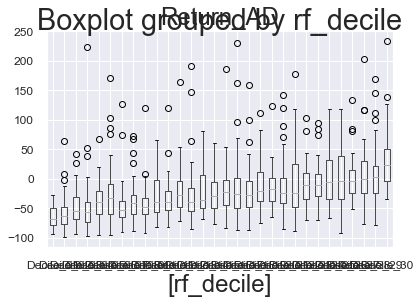

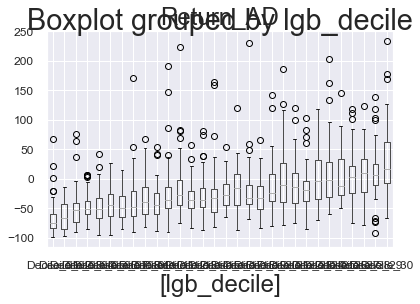

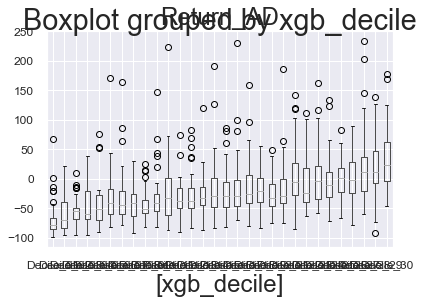

In [45]:
boxplot = df_valid_out.boxplot(column=['Return_AD'], by=['rf_decile'],layout=(1, 1))
boxplot = df_valid_out.boxplot(column=['Return_AD'], by=['lgb_decile'])
boxplot = df_valid_out.boxplot(column=['Return_AD'], by=['xgb_decile'])

## With deciles the results are better concentrated in top deciles


In [48]:
df_valid_out.to_csv('df_validations_2021_30Deciles.csv')

In [47]:
import pickle
# Save to file in the current working directory
pkl_rf_model = ".\\Model\\rf_model.pkl"
pkl_xgb_model = ".\\Model\\xgb_model.pkl"
pkl_lgb_model = ".\\Model\\lgb_model.pkl"

with open(pkl_rf_model, 'wb') as file:
    pickle.dump(rf_model, file)
with open(pkl_xgb_model, 'wb') as file:
    pickle.dump(xgb_model, file)
with open(pkl_lgb_model, 'wb') as file:
    pickle.dump(lgb_model, file)